# First Machine learning model, took a simple dataset to see how data is processed and how data is given to algorithm

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### The most important thing is to first know what dataset are you dealing with questions like 
#### size , shape and description is very important and really useful as we 
#### progress further so what are the key things we need to know about the dataset ? 

In [4]:
print(train.shape)
print(train.size)

(891, 12)
10692


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
train[train['Fare'] > 200].groupby('Survived').count()[['Fare']]

,Fare
Survived,
0,6
1,14


#### A little observation, people whose ticket priced above 500 they all survived
#### Also people whose ticket priced above 200 had better chance of being survived
#### Above observation, 20 people having tickets priced above 200 and 20 out of them survived

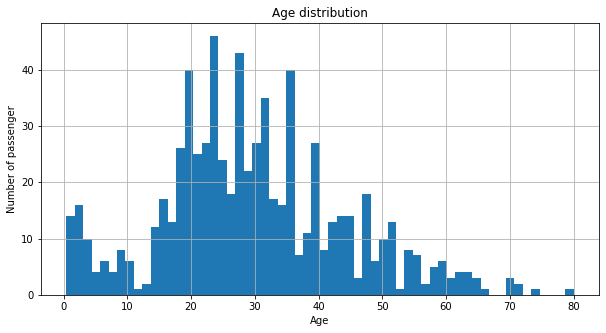

In [6]:
plt.figure(figsize = (10, 5))
train['Age'].hist(bins = 60)

plt.xlabel('Age')
plt.ylabel('Number of passenger')
plt.title('Age distribution')
plt.show()

#### Observation
* People ranging from 20-40 had more attendence
* Older people were very few in number
* People aged between 20-25 were highest
* Oldest person to travel was 79.

In [7]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


#### As Sex column is not numeric, we need to convert it to numeric.
#### apply takes a function and applies it to all values of pandas series.

In [8]:
train['Sex'] = train['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [9]:
#### Same we did for the test data's Sex column
test['Sex'] = test['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [11]:
train['Age'].isnull().sum()

177

#### There are null values in age column so, need to deal it with by removing them or applying any method
#### Checking minimum and maximum age value based on which I will pick a mthod to fill these null values

In [10]:
print(f"Minimum age - {min(train['Age'])} Maximum age - {max(train['Age'])}")

Minimum age - 0.42 Maximum age - 80.0


In [12]:
test['Age'].isnull().sum()

86

#### As there are some very few high value, it would not be great to use MEAN as it will be affected by it
#### As we saw earlier, there are many values lying in 20-40 age so, will pick a value among them
#### For this I used MODE method
#### Using fillna method to apply mode and picking 1st value from mode's result

In [13]:
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])

In [14]:
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

#### Converting float to int8 for lower storage

In [15]:
train['Age'] = train['Age'].astype('int8')

In [16]:
test['Age'] = test['Age'].astype('int8')

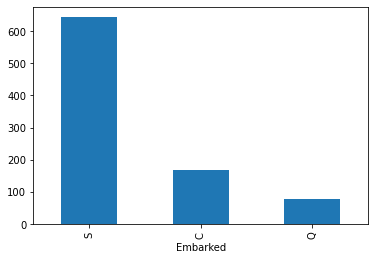

In [6]:
train['Embarked'].value_counts().plot(kind = 'bar')
plt.show()

#### checking the different station from where people embarked on the ship, all the places are in europe
#### S - Southampton, C for Cherbough, Q - Queenstown

In [18]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [19]:
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [20]:
train['Embarked'] = train['Embarked'].map({'S' : 1, 'C' : 2, 'Q' : 3})

In [21]:
test['Embarked'] = test['Embarked'].map({'S' : 1, 'C' : 2, 'Q' : 3})

In [22]:
train.Embarked = train.Embarked.astype('int8')

In [23]:
test.Embarked = test.Embarked.astype('int8')

In [24]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,NaN,1


#### Based on the observation, we can pick column which we believe can give us good predictions
#### Below columns are picked to check how it can be applied to or feed to ML algorithm

In [25]:
# here I have picked some columns which are called independent variables
cols = ['Pclass', 'Sex', 'Age', 'Embarked']

In [27]:
# this is the dependent variable
survived = train['Survived'].values

In [28]:
# making a training dataset
dtrain = train[cols].values

In [29]:
# making a testing dataset
dtest = test[cols].values

#### As this is the classification problem, we will try a classification algorithm

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Created a object or a copy of Logistic Regression class
model = LogisticRegression()

In [32]:
# fit the training data into the model
# fit() – It calculates the parameters or weights on the training data
model.fit(dtrain, survived)

LogisticRegression()

In [33]:
# from the weights got from fitting the data, i predict method will apply those weight to test data and will give
# give prediction as output
pred = model.predict(dtest)

In [8]:
# Converting the prediction array to a datafrome
prediction = pd.DataFrame(pred, index = True, columns = ['PassengerId', 'Survived'])
prediction.to_csv('pred.csv')

In [51]:
# Prediction for the test dataset
pd.read_csv('pred.csv')

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0
